# Example from YouTube (Abraham Asfaw):
https://www.youtube.com/watch?v=M4EkW4VwhcI&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=2

Gates description: https://quantum-computing.ibm.com/docs/circ-comp/q-gates

## Import & Preparations

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import operator
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit import *

In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.14.2',
 'qiskit-aer': '0.5.2',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.2',
 'qiskit-aqua': '0.7.2',
 'qiskit': '0.19.4'}

In [ ]:
if False:
    # Run only once from a file in local directory, contain the key from 
    # https://quantum-computing.ibm.com
    f = open('mykey.txt', 'r')
    IBMQ.save_account(f.read())

In [4]:
if True:
    # run after clear
    IBMQ.load_account()

# Hello World - Create etanglement

In [40]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)
style.use('dark_background')
circuit.draw()

q1_0: 
      
q1_1: 
      
c1_0: 
      
c1_1:

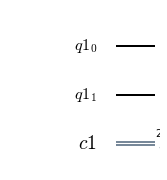

In [41]:
circuit.draw(output='mpl')

## Hadamard gate --> Make Superposition

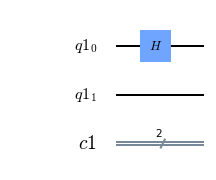

In [42]:
# Hadamard gate rotates the states |0> and |1> to |+ > and |- > 
circuit.h(qr[0]) # 
circuit.draw(output='mpl')

## CX Gate - The controlled-X gate is also known as the controlled-NOT

In [43]:
circuit.cx(qr[0], qr[1])

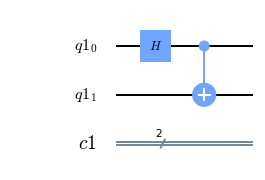

In [44]:
circuit.draw(output='mpl')

In [45]:
circuit.draw()

┌───┐     
q1_0: ┤ H ├──■──
      └───┘┌─┴─┐
q1_1: ─────┤ X ├
           └───┘
c1_0: ══════════
                
c1_1: ══════════

## Measure - Save the qbits into classical bits

In [46]:
circuit.measure(qr, cr)
circuit.draw()

┌───┐     ┌─┐   
q1_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q1_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c1_0: ═══════════╩══╬═
                    ║ 
c1_1: ══════════════╩═

## Run local simulator (ideal case - no errors)

Text(0.2, 0.35, 'Only entangled states |00> and |11> are appear\nMixed states |01> and |10> are not appear')

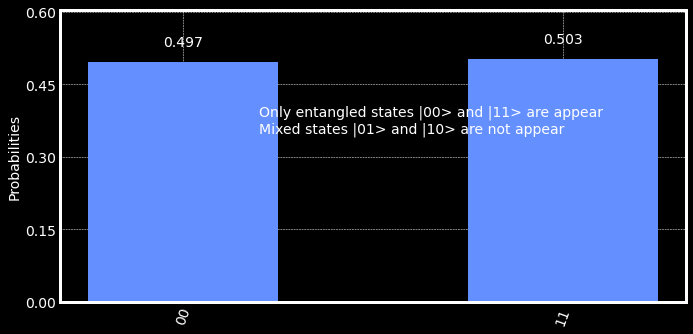

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()
fig, ax = plt.subplots(figsize=(10,5))
plot_histogram(result.get_counts(circuit), ax=ax)
ax.text(0.2, 0.35, 'Only entangled states |00> and |11> are appear\nMixed states |01> and |10> are not appear')

## Run cloud quantum compute (contain errors, yet)

In [13]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


Text(0.5, 0.35, '|01> and |10> should have 0 probability\nbut due to error in the quantum compute\nthere is non-zero probability')

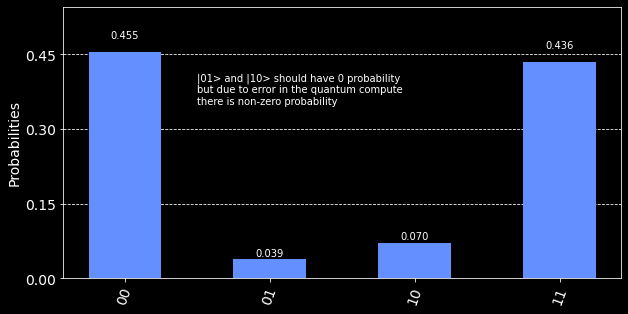

In [31]:
result = job.result()
fig, ax = plt.subplots(figsize=(10,5))
plot_histogram(result.get_counts(circuit), ax=ax)
ax.text(0.5, 0.35, '|01> and |10> should have 0 probability\nbut due to error in the quantum compute\nthere is non-zero probability')

# Teleportation Example - Send a qubit into another

## X gate - 180˚ rotation around X-axis - Similar to NOT for |0> or |1>

In [32]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
print(statevector)
circuit.draw()

[0.+0.j 1.+0.j]


┌───┐
q_0: ┤ X ├
     └───┘
c_0: ═════

### Present using Bloch Sphere

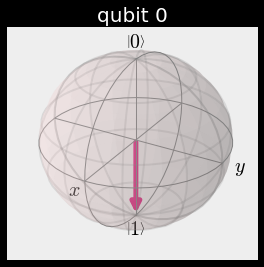

In [33]:
style.use('fivethirtyeight')
style.use('dark_background')
style.use('bmh')
plot_bloch_multivector(statevector)

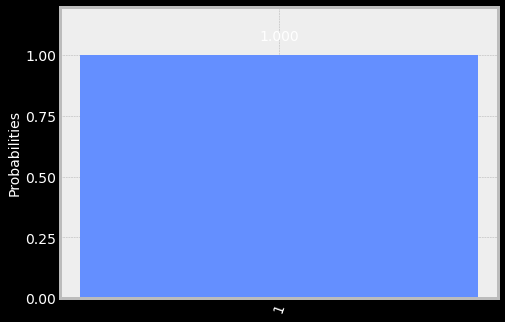

In [34]:
circuit.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots=1024).result()
counts = result.get_counts()
plot_histogram(counts)

## Teleportation

In [35]:
circuit = QuantumCircuit(1, 1)
circuit.x(0)
simulator = Aer.get_backend('unitary_simulator') # presentation of the result as a matrix
result = execute(circuit, backend=simulator).result()
unitary = result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [48]:
circuit = QuantumCircuit(3, 3) # 3 qubit and 3 classical
circuit.x(0) # Teleport qubit 0 --> converted to |1>
circuit.barrier()
# Entangelment on bit 1
circuit.h(1) # Entangelment on bit 1
circuit.cx(1, 2) # Control gate by 1 to 2

circuit.cx(0, 1) # Control gate by 0 to 1
circuit.h(0) 
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.barrier()
circuit.cx(1, 2) # Control gate by 1 to 2
circuit.cz(0, 2) # Control gate by 1 to 2 ----> Unclear
circuit.measure(2, 2)
circuit.draw()

┌───┐ ░                ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘           ░  ║  ║  ░ └───┘   └╥┘
c_0: ════════════════════════════════╩══╬═════════════╬═
                                        ║             ║ 
c_1: ═══════════════════════════════════╩═════════════╬═
                                                      ║ 
c_2: ═════════════════════════════════════════════════╩═

{'100': 276, '101': 271, '110': 207, '111': 270}


Text(0.5, 0.16, 'Bit 0 set |1> by X-gate\n.   \n.   \nOnly states |1**> are appear\nStates |0**> has zero probability')

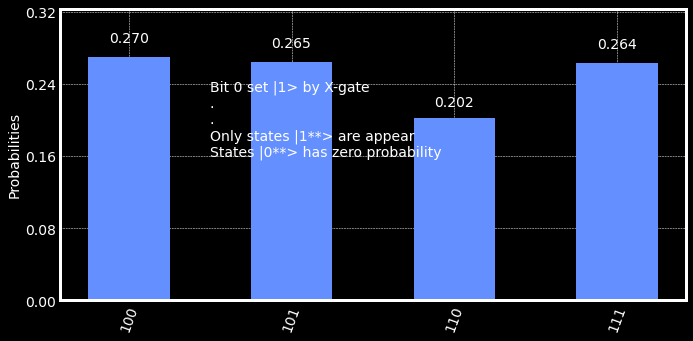

In [54]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = backend, shots=1024).result()
counts = result.get_counts()
style.use('dark_background')
print(counts) # first bit is #2, last bit is #0 ==> we'll get only states were #2 == |1>
fig, ax = plt.subplots(figsize=(10,5))
plot_histogram(counts, ax=ax)
ax.text(0.5, 0.16, 'Bit 0 set |1> by X-gate' +
        '\n.   '+
         '\n.   '+
       '\nOnly states |1**> are appear'+
       '\nStates |0**> has zero probability')

# Bernstein-Vazirani Algorithm (find 6 bit number in one q-operation)

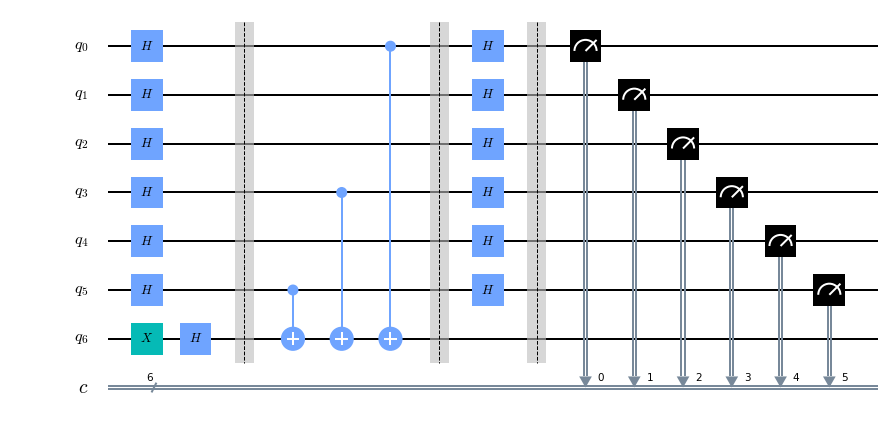

In [55]:
secretnumber = '101001'
circuit = QuantumCircuit(6+1, 6)
circuit.h([0, 1, 2, 3, 4, 5])
circuit.x(6)
circuit.h(6)
circuit.barrier()

# Encode the secret number 
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(0, 6)
circuit.barrier()


circuit.h([0, 1, 2, 3, 4, 5])
circuit.barrier()
circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

circuit.draw('mpl')

In [56]:
backend = Aer.get_backend('qasm_simulator')
result = qiskit.execute(circuit, backend = backend, shots=1).result() # 1 shot for one operation
counts = result.get_counts()
print('The secret number is: ', counts)

The secret number is:  {'101001': 1}


In [57]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


Text(0.5, 0.09, 'Bit ____\n         \n ')

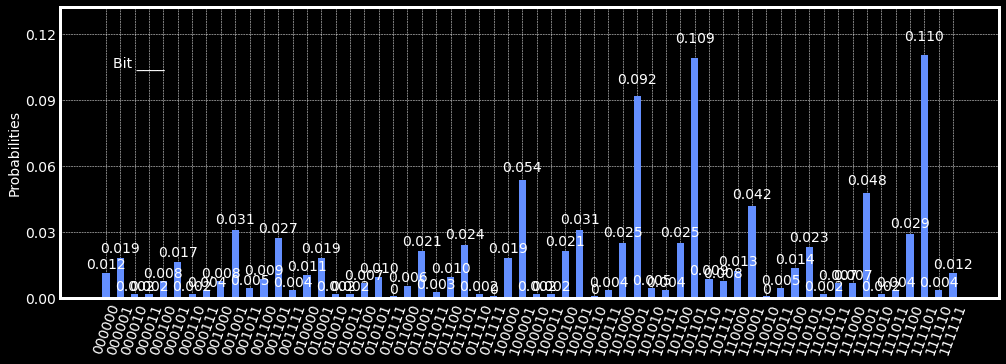

In [61]:
result = job.result()
fig, ax = plt.subplots(figsize=(15,5))
plot_histogram(result.get_counts(circuit), ax=ax)
ax.text(0.5, 0.09, 'Bit ____' +
        '\n         '+
        '\n ')

Job Status: job has successfully run


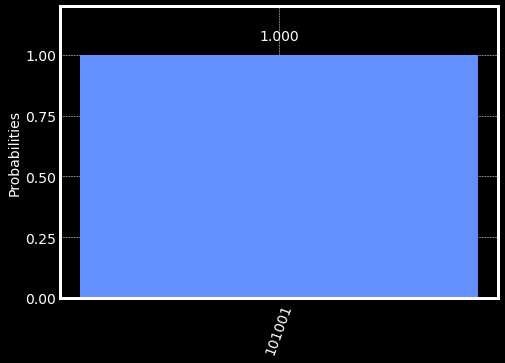

In [62]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_qasm_simulator') # probably a simulator rather than real quantum computer
job = execute(circuit, backend=qcomp)
job_monitor(job)
result = job.result()
plot_histogram(result.get_counts(circuit))

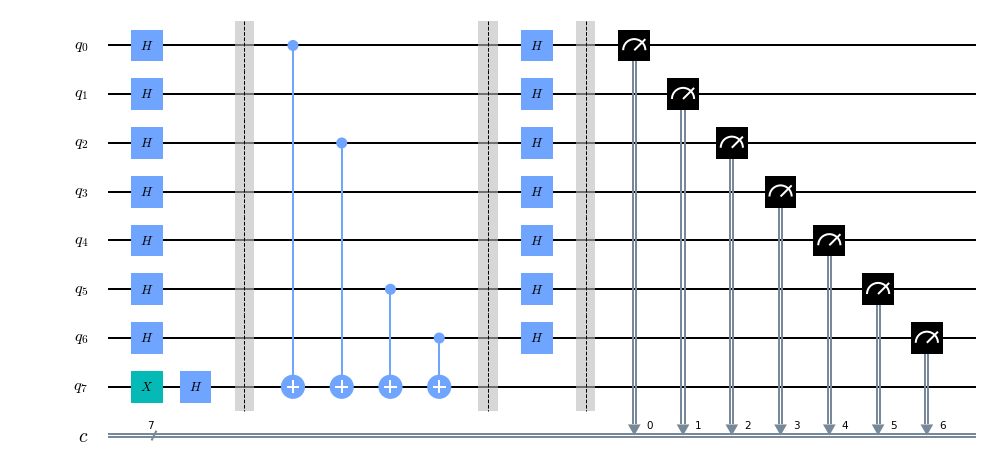

In [74]:
# Any secret number
secretnumber = '1100101' # Any number up to 15 digits could work
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))
circuit.barrier()

# Encode the secret number 
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()


circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

circuit.draw(output='mpl')

In [82]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne') 
shots = 4096
job = execute(circuit, backend=qcomp, shots=shots)
job_monitor(job)
result = job.result()

Job Status: job has successfully run


{'0111110': 22, '1000101': 53, '0011101': 19, '1011100': 22, '1111110': 32, '0000100': 25, '0000101': 31, '0011100': 20, '1011010': 45, '1000100': 36, '0111100': 20, '1000001': 43, '1101001': 50, '0001011': 40, '1100011': 40, '0001001': 28, '1100001': 44, '1101010': 38, '0010111': 29, '1111100': 23, '0101100': 23, '1100110': 24, '1110000': 42, '0000011': 42, '1111000': 39, '1110001': 42, '1111010': 37, '0010101': 32, '1100111': 47, '1011111': 38, '0000000': 31, '1010111': 39, '0110101': 30, '1000011': 44, '1011000': 30, '0100110': 26, '1100101': 44, '1010010': 44, '0000010': 31, '0101011': 33, '1111001': 41, '1101011': 43, '1010001': 41, '0100101': 23, '1001000': 39, '1110100': 21, '0100010': 38, '0110011': 23, '1001010': 35, '1001011': 44, '1011101': 30, '0101101': 24, '0000110': 31, '0011111': 24, '1110110': 40, '1101101': 39, '0010000': 25, '0111011': 14, '1010000': 31, '1101110': 33, '0000001': 30, '0101010': 31, '1111011': 27, '0010011': 22, '0110100': 31, '0111111': 27, '1011011'

Text(0.5, 0.015, 'Expected result is 1100101\nActual count for 1100101 is 0.01074\nMaximum is for 1000111 ')

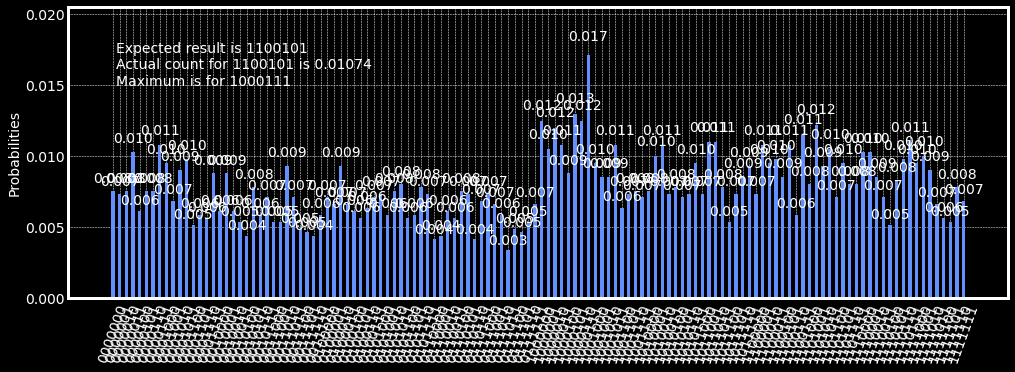

In [91]:
print(result.get_counts(circuit))
fig, ax = plt.subplots(figsize=(15,5))
plot_histogram(result.get_counts(circuit), ax=ax)
ax.text(0.5, 0.015, 'Expected result is %s'%(secretnumber) +
        '\nActual count for %s is %5.5f'%(secretnumber,result.get_counts(circuit)[secretnumber]/shots) +
        '\nMaximum is for %s '%(max(result.get_counts(circuit).items(), key=operator.itemgetter(1))[0]))

# Try other stuff

## Apply Hadamard twice ==> Break entaglement

In [92]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌───┐ ░ ┌─┐   
q_0: ┤ H ├──■──┤ H ├─░─┤M├───
     └───┘┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ─────┤ X ├──────░──╫─┤M├
          └───┘      ░  ║ └╥┘
c_0: ═══════════════════╩══╬═
                           ║ 
c_1: ══════════════════════╩═

{'00': 513, '01': 539, '10': 504, '11': 492}


Text(0.5, 0.15, 'Distributed uniformly between the bits - No entanglement anymore')

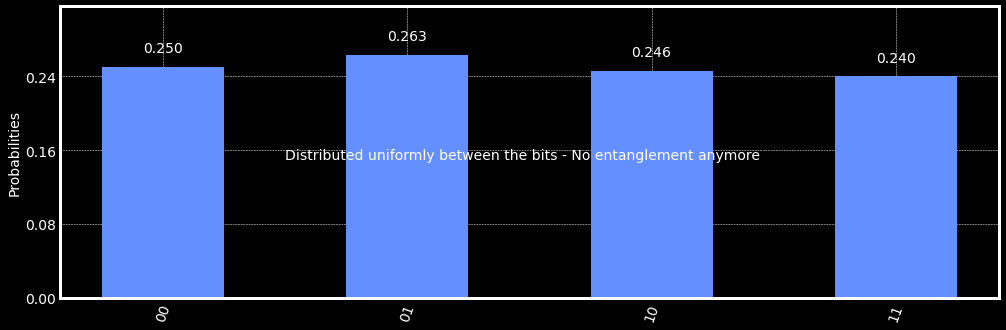

In [94]:
backend = Aer.get_backend('qasm_simulator')
result = qiskit.execute(circuit, backend = backend, shots=2048).result()
counts = result.get_counts()
style.use('dark_background')
print(counts) # first bit is #2, last bit is #0 ==> we'll get only states were #2 == |1>
fig, ax = plt.subplots(figsize=(15,5))
plot_histogram(counts, ax=ax)
ax.text(0.5, 0.15, 'Distributed uniformly between the bits - No entanglement anymore')